# Lab 1: Nearest Neighbor Regression and Overfitting

This is based on the notebook file [01 in Aurélien Geron's github page](https://github.com/ageron/handson-ml)

In [13]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
%matplotlib inline
plt.style.use('ggplot')
sns.set()

# Where to save the figures
PROJECT_ROOT_DIR = ".."
datapath = PROJECT_ROOT_DIR + "/data/lifesat/"

# Load and prepare data

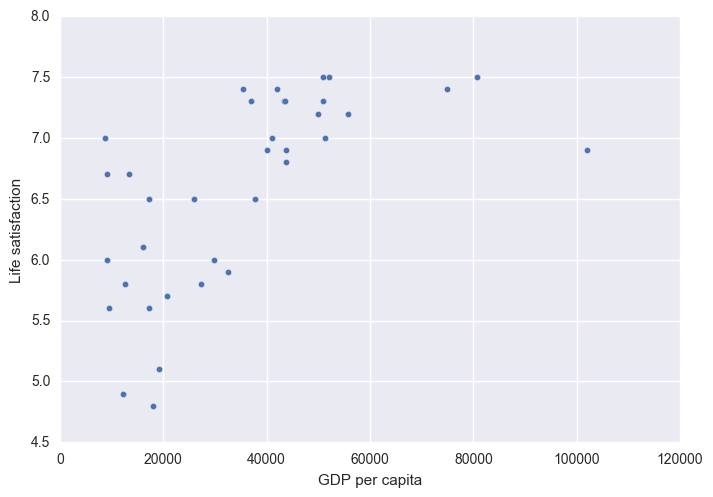

In [2]:
# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.columns

oecd_bli["Life satisfaction"].head()

# Load and prepare GDP per capita data

# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace="True")

_ = full_country_stats.plot("GDP per capita",'Life satisfaction',kind='scatter')

Here's the full dataset, and there are other columns.  I will subselect a few of them by hand.

In [7]:
xvars = ['Self-reported health','Water quality','Quality of support network','GDP per capita']

In [9]:
X = np.array(full_country_stats[xvars])
y = np.array(full_country_stats['Life satisfaction'])

I will define the following functions to expedite the LOO risk and the Empirical risk.

In [18]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

In [19]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
print('LOO Risk: '+ str(loo_risk(X,y,lin1)))
print('Emp Risk: ' + str(emp_risk(X,y,lin1)))

LOO Risk: 0.348022001422
Emp Risk: 0.2703035744


As you can see, the empirical risk is much less than the leave-one-out risk!  This can happen in more dimensions.

## Nearest neighbor regression

Use the method described here: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

I have already imported the necessary module, so you just need to use the regression object (like we used LinearRegression)

In [20]:
# knn = neighbors.KNeighborsRegressor(n_neighbors=5)

**Exercise 1** For each k from 1 to 10 compute the nearest neighbors empirical risk and LOO risk. Plot these as a function of k and reflect on the bias-variance tradeoff here. (Hint: use the previously defined functions)

**Exercise 2** Do the same but for the reduced predictor variables below...

In [34]:
X = np.array(full_country_stats[['Self-reported health']])